## 1. Khai báo thư viện



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyvi
!pip install underthesea
!pip install unidecode
!pip install plotly --upgrade

     |████████████████████████████████| 8.5MB 11.1MB/s 
     |████████████████████████████████| 747kB 55.2MB/s 
     |████████████████████████████████| 7.5MB 12.0MB/s 
     |████████████████████████████████| 1.3MB 45.1MB/s 
     |████████████████████████████████| 6.7MB 53.8MB/s 
     |████████████████████████████████| 753.2MB 23kB/s 
     |████████████████████████████████| 51kB 8.8MB/s 
     |████████████████████████████████| 245kB 61.5MB/s 
     |████████████████████████████████| 890kB 53.2MB/s 
     |████████████████████████████████| 1.1MB 42.2MB/s 
     |████████████████████████████████| 2.9MB 46.0MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-cp36-none-any.whl size=16171 sha256=553350e6eb19d2023c45f8191dca5f9a0ed0b523d888e940d5fad7b1febe036d
  Stored in directory: /root/.cache/pip/wheels/52/df/1b/45d75646c37428f7e626214704a0e35bd3cfc32eda37e59e5f
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=e92c31a1fe59784d6254846300404f

     |████████████████████████████████| 13.2MB 253kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
# import các thư viện cần thiết
import pandas as pd
import numpy as np
from pyvi import ViTokenizer
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.base import BaseEstimator, TransformerMixin

import sys
sys.path.append("/content/drive/MyDrive/")

## 2. Load dữ liệu

In [ ]:
# load dữ liệu
df = pd.read_csv('/content/drive/MyDrive/BML/data.csv')
df.head()

,comment,label,rate,Unnamed: 3
0,Áo bao đẹp ạ!!,POS,5,NaN
1,Tuyệt vời !,POS,5,NaN
2,2day ao khong giong trong.,NEG,1,NaN
3,"Mùi thơm,bôi lên da mềm da.",POS,5,NaN
4,"Vải đẹp, dày dặn.",POS,5,NaN


In [ ]:
df=df.drop(['Unnamed: 3'],axis=1)

In [ ]:
df.describe()

,rate
count,31460.000000
mean,3.736840
std,1.382483
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [ ]:
# Tổng quan về dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31460 entries, 0 to 31459
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  31460 non-null  object
 1   label    31460 non-null  object
 2   rate     31460 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 737.5+ KB


In [ ]:
# Kiểm tra các bản ghi có rỗng hay không
df.isnull().sum()

comment    0
label      0
rate       0
dtype: int64

## 3. Phân tích dữ liệu

In [ ]:
# Phân bố label
def label_count(df,name):
    label = df[name].unique()
    count = df[name].value_counts(sort=True)
    sns.set()
    print(count)
    chart = sns.barplot(count.index, count, palette='husl')
    plt.savefig('/content/drive/MyDrive/BML/images/phan_bo_' + name + '.png')
    plt.show()
    


POS    20093
NEG     6669
NEU     4698
Name: label, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


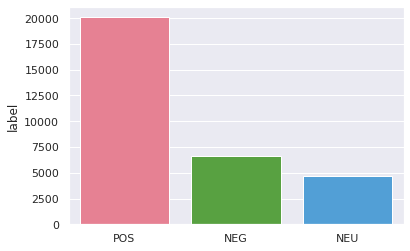

In [ ]:
label_count(df,'label')

5    13286
4     6807
3     4698
1     3529
2     3140
Name: rate, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


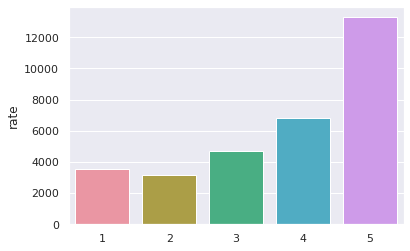

In [ ]:
# Phân bố rate
label_count(df, 'rate')

<Figure size 1440x720 with 0 Axes>

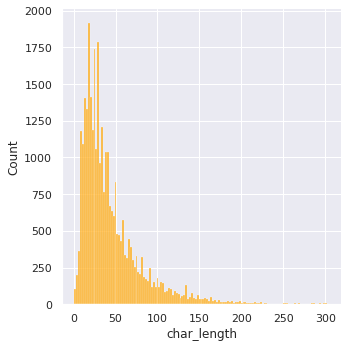

Min sentence: 1
Max sentence: 304
Mean: 44.91179275270184


In [ ]:
# Thống kê chiều dài của mỗi câu theo ký tự
df['char_length'] = df['comment'].apply(lambda x: len(str(x)))
plt.figure(figsize=(20,10))
sns.set(palette=['orange'])
# df['char_length'].hist(bins=50)
sns.displot(data=df['char_length'])
plt.savefig('/content/drive/MyDrive/BML/images/phan_bo_chieu_dai_cau_theo_ky_tu.png')
plt.show()
print("Min sentence:", df['char_length'].min())
print("Max sentence:", df['char_length'].max())
print("Mean:", df['char_length'].mean())

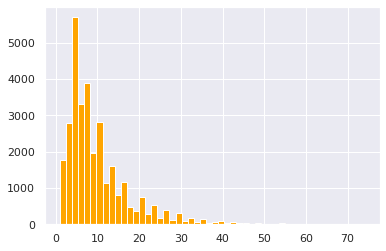

Min sentence: 1
Max sentence: 74
Mean: 10.220629370629371


In [ ]:
# Thống kê chiều dài của mỗi câu theo từ (tách theo khoảng trắng)
df['word_length'] = df['comment'].apply(lambda x: len(x.split()))
sns.set(palette=['orange'])
df['word_length'].hist(bins=50)
plt.savefig('/content/drive/MyDrive/BML/images/phan_bo_chieu_dai_cau_theo_tu.png')
plt.show()
print("Min sentence:", df['word_length'].min())
print("Max sentence:", df['word_length'].max())
print("Mean:", df['word_length'].mean())

## Thống kê sau khi tiền xử lý dữ liệu

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/BML/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/BML/test.csv')
eval_df = pd.read_csv('/content/drive/MyDrive/BML/eval.csv')
merge_df = pd.concat([train_df, test_df, eval_df], axis=0)
merge_df.shape

(30679, 3)

POS    19615
NEG     6528
NEU     4536
Name: label, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


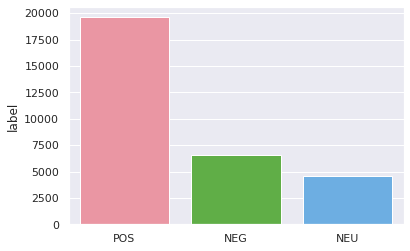

In [ ]:
label_count(merge_df, 'label')

5    12972
4     6643
3     4536
1     3438
2     3090
Name: rate, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


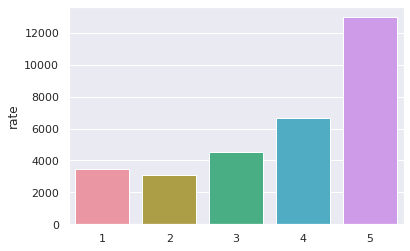

In [ ]:
label_count(merge_df, 'rate')

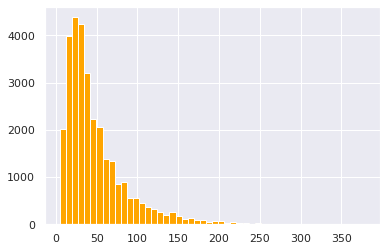

Min sentence: 5
Max sentence: 378
Mean: 49.330356269761076


In [ ]:
# Thống kê chiều dài của mỗi câu theo ký tự
merge_df['char_length'] = merge_df['comment'].apply(lambda x: len(str(x)))
sns.set(palette=['orange'])
merge_df['char_length'].hist(bins=50)
plt.savefig('/content/drive/MyDrive/BML/images/phan_bo_chieu_dai_cau_theo_ky_tu1.png')
plt.show()
print("Min sentence:", merge_df['char_length'].min())
print("Max sentence:", merge_df['char_length'].max())
print('Mean:', merge_df['char_length'].mean())

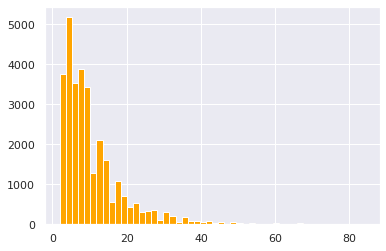

Min sentence: 2
Max sentence: 84
Mean: 10.678183773917011


In [ ]:
# Thống kê chiều dài của mỗi câu theo từ (tách theo khoảng trắng)
merge_df['word_length'] = merge_df['comment'].apply(lambda x: len(x.split()))
sns.set(palette=['orange'])
merge_df['word_length'].hist(bins=50)
plt.savefig('/content/drive/MyDrive/BML/images/phan_bo_chieu_dai_cau_theo_tu1.png')
plt.show()
print("Min sentence:", merge_df['word_length'].min())
print("Max sentence:", merge_df['word_length'].max())
print('Mean:', merge_df['word_length'].mean())

In [ ]:
# Tách từ tiếng việt
def tokenize_vn(s):
  return ViTokenizer.tokenize(s)

In [ ]:
def remove_stop_words(s, stop_words):
  s = s.split()
  res = []
  for i in s:
    if i not in stop_words:
      res.append(i)
  return ' '.join(res)

In [ ]:
# Thống kê top 30 từ thông dụng khi chưa remove stop-word
def top_n_popular_words(sentences):
  res = []
  for s in sentences:
    s = tokenize_vn(s).split()
    for i in s:
      res.append(i)
  res = pd.DataFrame(res)
  count_word = res.value_counts()[:30]
  word = []
  for i in range(len(count_word.index)):
    word.append(count_word.index[i][0])
  plt.figure(figsize=(20,10))
  sns.barplot(count_word, word)
  plt.savefig('/content/drive/MyDrive/BML/images/top_30_words1.png')
  plt.show()
  return count_word


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


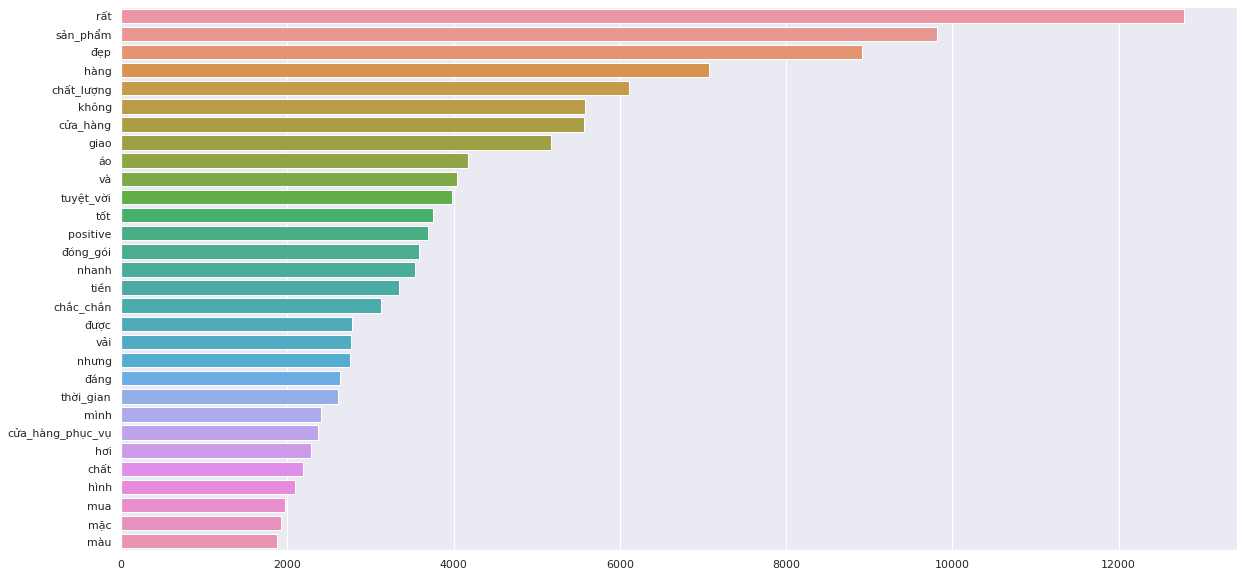

In [ ]:
word_count = top_n_popular_words(merge_df['comment'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


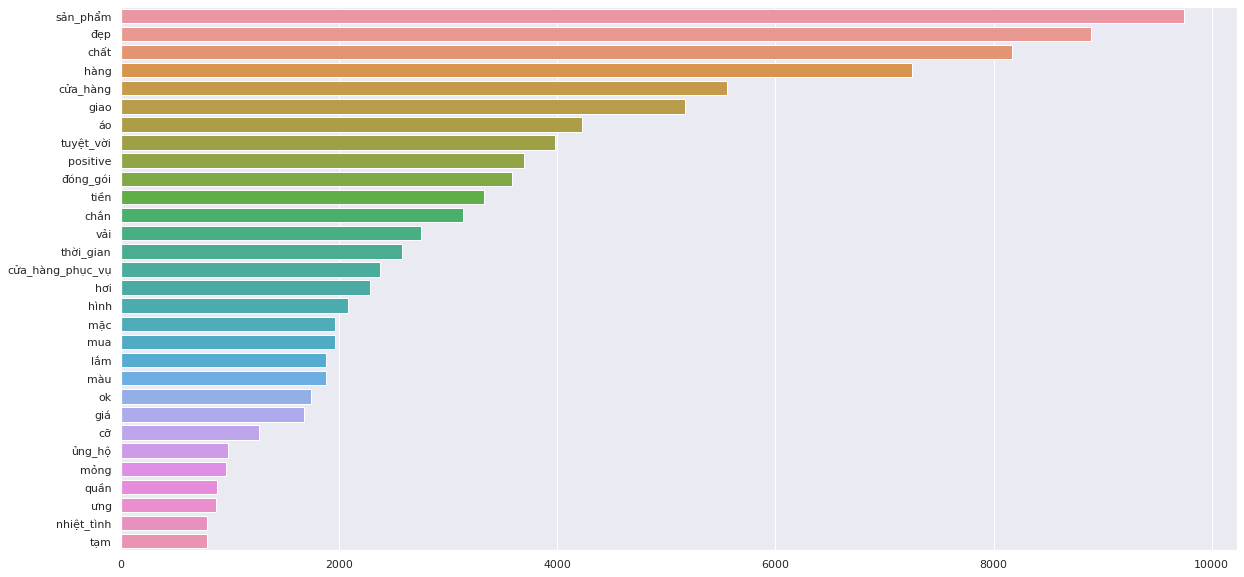

sản_phẩm            9747
đẹp                 8892
chất                8167
hàng                7252
cửa_hàng            5558
giao                5169
áo                  4224
tuyệt_vời           3975
positive            3691
đóng_gói            3586
tiền                3327
chắn                3132
vải                 2753
thời_gian           2572
cửa_hàng_phục_vụ    2377
hơi                 2283
hình                2078
mặc                 1964
mua                 1957
lắm                 1875
màu                 1874
ok                  1743
giá                 1677
cỡ                  1263
ủng_hộ               984
mỏng                 962
quần                 874
ưng                  871
nhiệt_tình           789
tạm                  788
dtype: int64

In [ ]:
# Remove stop words
sw_path = '/content/drive/MyDrive/BML/vietnamese-stopwords-dash.txt'
with open(sw_path, mode='r', encoding='utf8') as f:
  stop_words = f.read().split('\n')
remove_sw = [remove_stop_words(i, stop_words) for i in merge_df['comment']]
word_count = top_n_popular_words(remove_sw)
word_count

In [ ]:
remove_stop_words('Hàng rất đẹp, rất chi là ưng ý.',stop_words)

'Hàng đẹp, chi ưng ý.'

# 4. Tiền xử lý dữ liệu

In [ ]:
def preprocessing(s):
  # chuẩn hóa về dạng viết thường
  s = s.lower()

  # loại bỏ các ký tự trùng nhau
  s = re.sub(r'([a-z])\1+', lambda m: m.group(1), s)
  s = re.sub(r'([a-z][a-z])\1+', lambda m: m.group(1), s)
  s = re.sub(r'(\))\1+', lambda m: m.group(1), s)
  s = re.sub(r'(\()\1+', lambda m: m.group(1), s)

  # chuẩn hóa các kí tự, chuyển đổi các icon, từ viết tắt
  replace_list = {
            'òa': 'oà', 'óa': 'oá', 'ỏa': 'oả', 'õa': 'oã', 'ọa': 'oạ', 'òe': 'oè', 'óe': 'oé','ỏe': 'oẻ',
            'õe': 'oẽ', 'ọe': 'oẹ', 'ùy': 'uỳ', 'úy': 'uý', 'ủy': 'uỷ', 'ũy': 'uỹ','ụy': 'uỵ', 'uả': 'ủa',
            'ả': 'ả', 'ố': 'ố', 'u´': 'ố','ỗ': 'ỗ', 'ồ': 'ồ', 'ổ': 'ổ', 'ấ': 'ấ', 'ẫ': 'ẫ', 'ẩ': 'ẩ',
            'ầ': 'ầ', 'ỏ': 'ỏ', 'ề': 'ề','ễ': 'ễ', 'ắ': 'ắ', 'ủ': 'ủ', 'ế': 'ế', 'ở': 'ở', 'ỉ': 'ỉ',
            'ẻ': 'ẻ', 'àk': u' à ','aˋ': 'à', 'iˋ': 'ì', 'ă´': 'ắ','ử': 'ử', 'e˜': 'ẽ', 'y˜': 'ỹ', 'a´': 'á',
            #Quy các icon về 2 loại emoj: Tích cực hoặc tiêu cực
            "👹": "negative", "👻": "positive", "💃": "positive",'🤙': ' positive ', '👍': ' positive ',
            "💄": "positive", "💎": "positive", "💩": "positive","😕": "negative", "😱": "negative", "😸": "positive",
            "😾": "negative", "🚫": "negative",  "🤬": "negative","🧚": "positive", "🧡": "positive",'🐶':' positive ',
            '👎': ' negative ', '😣': ' negative ','✨': ' positive ', '❣': ' positive ','☀': ' positive ',
            '♥': ' positive ', '🤩': ' positive ', 'like': ' positive ', '💌': ' positive ',
            '🤣': ' positive ', '🖤': ' positive ', '🤤': ' positive ', ':(': ' negative ', '😢': ' negative ',
            '❤': ' positive ', '😍': ' positive ', '😘': ' positive ', '😪': ' negative ', '😊': ' positive ',
            '?': ' ? ', '😁': ' positive ', '💖': ' positive ', '😟': ' negative ', '😭': ' negative ',
            '💯': ' positive ', '💗': ' positive ', '♡': ' positive ', '💜': ' positive ', '🤗': ' positive ',
            '^^': ' positive ', '😨': ' negative ', '☺': ' positive ', '💋': ' positive ', '👌': ' positive ',
            '😖': ' negative ', '😀': ' positive ', ':((': ' negative ', '😡': ' negative ', '😠': ' negative ',
            '😒': ' negative ', '🙂': ' positive ', '😏': ' negative ', '😝': ' positive ', '😄': ' positive ',
            '😙': ' positive ', '😤': ' negative ', '😎': ' positive ', '😆': ' positive ', '💚': ' positive ',
            '✌': ' positive ', '💕': ' positive ', '😞': ' negative ', '😓': ' negative ', '️🆗️': ' positive ',
            '😉': ' positive ', '😂': ' positive ', ':v': '  positive ', '=))': '  positive ', '😋': ' positive ',
            '💓': ' positive ', '😐': ' negative ', ':3': ' positive ', '😫': ' negative ', '😥': ' negative ',
            '😃': ' positive ', '😬': ' 😬 ', '😌': ' 😌 ', '💛': ' positive ', '🤝': ' positive ', '🎈': ' positive ',
            '😗': ' positive ', '🤔': ' negative ', '😑': ' negative ', '🔥': ' negative ', '🙏': ' negative ',
            '🆗': ' positive ', '😻': ' positive ', '💙': ' positive ', '💟': ' positive ', '👩': ' positive ','🏫': ' positive ',
            '😚': ' positive ', '❌': ' negative ', '👏': ' positive ', ';)': ' positive ', '<3': ' positive ',
            '🌝': ' positive ',  '🌷': ' positive ', '🌸': ' positive ', '🌺': ' positive ', '🤦': ' negative ',
            '🌼': ' positive ', '🍓': ' positive ', '🐅': ' positive ', '🐾': ' positive ', '👉': ' positive ',
            '💐': ' positive ', '💞': ' positive ', '💥': ' positive ', '💪': ' positive ', '🥀': ' negative ', '🌹': ' positive ',
            '💰': ' positive ',  '😇': ' positive ', '😛': ' positive ', '😜': ' positive ', '😅': ' positive ', '🤭': ' negative ',
            '🙃': ' positive ', '🤑': ' positive ', '🤪': ' positive ','☹': ' negative ',  '💀': ' negative ',
            '😔': ' negative ', '😧': ' negative ', '😩': ' negative ', '😰': ' negative ', '😳': ' negative ',
            '😵': ' negative ', '😶': ' negative ', '🙁': ' negative ', '✅': ' positive ', '🙈' : ' positive ',
            ':"(': ' negative ', ':\'(': ' negative ', '🎶': ' positive ', '🎵': ' positive ', '😌': ' negative ' ,
            
            
            #Chuẩn hóa 1 số sentiment words/English words
            ':))': '  positive ', ':)': ' positive ', 'ô kêi': ' ok ', 'okie': ' ok ', ' o kê ': ' ok ',
            'okey': ' ok ', 'ôkê': ' ok ', 'oki': ' ok ', ' oke ':  ' ok ',' okay':' ok ','okê':' ok ',
            ' tks ': u' cám ơn ', 'thks': u' cám ơn ', 'thanks': u' cám ơn ', 'ths': u' cám ơn ', 'thank': u' cám ơn ',
            '⭐': 'star ', '*': 'star ', '🌟': 'star ', '🎉': u' positive ', 'khong': 'không',
            'kg ': u' không ','not': u' không ', u' kg ': u' không ', '"k ': u' không ',' kh ':u' không ','kô':u' không ','hok':u' không ',' kp ': u' không phải ',u' kô ': u' không ', '"ko ': u' không ', u' ko ': u' không ', u' k ': u' không ', 'khong': u' không ', u' hok ': u' không ',
            'he he': ' positive ','hehe': ' positive ','hihi': ' positive ', 'haha': ' positive ', 'hjhj': ' positive ',
            ' lol ': ' negative ',' cc ': ' negative ','cute': u' dễ thương ','huhu': ' negative ', ' vs ': u' với ', 'wa': ' quá ', 'wá': u' quá', 'j': u' gì ', '“': ' ',
            ' sz ': u' cỡ ', 'size': u' cỡ ', u' đx ': u' được ', 'dk': u' được ', 'dc': u' được ', 'đk': u' được ',
            'đc': u' được ','authentic': u' chuẩn chính hãng ',u' aut ': u' chuẩn chính hãng ', u' auth ': u' chuẩn chính hãng ', 'thick': u' positive ', 'store': u' cửa hàng ',
            'shop': u' cửa hàng ', 'sp': u' sản phẩm ', 'gud': u' tốt ','god': u' tốt ','wel done':' tốt ', 'good': u' tốt ', 'gút': u' tốt ',
            'sấu': u' xấu ','gut': u' tốt ', u' tot ': u' tốt ', u' nice ': u' tốt ', 'perfect': 'rất tốt', 'bt': u' bình thường ',
            'time': u' thời gian ', 'qá': u' quá ', u' ship ': u' giao hàng ', u' m ': u' mình ', u' mik ': u' mình ',
            'ể': 'ể', 'product': 'sản phẩm', 'quality': 'chất lượng','chat':' chất ', 'excelent': 'hoàn hảo', 'bad': 'tệ','fresh': ' tươi ','sad': ' tệ ',
            'date': u' hạn sử dụng ', 'hsd': u' hạn sử dụng ','quickly': u' nhanh ', 'quick': u' nhanh ','fast': u' nhanh ','delivery': u' giao hàng ',u' síp ': u' giao hàng ',
            'beautiful': u' đẹp tuyệt vời ', u' tl ': u' trả lời ', u' r ': u' rồi ', u' shopE ': u' cửa hàng ',u' order ': u' đặt hàng ',
            'chất lg': u' chất lượng ',u' sd ': u' sử dụng ',u' dt ': u' điện thoại ',u' nt ': u' nhắn tin ',u' tl ': u' trả lời ',u' sài ': u' xài ',u'bjo':u' bao giờ ',
            'thik': u' thích ',u' sop ': u' cửa hàng ', ' fb ': ' facebook ', ' face ': ' facebook ', ' very ': u' rất ',u'quả ng ':u' quảng  ',
            'dep': u' đẹp ',u' xau ': u' xấu ','delicious': u' ngon ', u'hàg': u' hàng ', u'qủa': u' quả ',
            'iu': u' yêu ','fake': u' giả mạo ', 'trl': 'trả lời', '><': u' positive ', u'pị': u'bị', u'qà': u'quà',
            ' por ': u' tệ ',' poor ': u' tệ ', 'ib':u' nhắn tin ', 'rep':u' trả lời ',u'fback':' feedback ','fedback':' feedback ',
            '6 sao': ' rất tuyệt vời ','6 star': ' rất tuyệt vời ', '5star': ' rất tuyệt vời ','5 sao': ' rất tuyệt vời ','5sao': ' rất tuyệt vời ',
            'starstarstarstarstar': ' rất tuyệt vời ', '1 sao': ' tệ ', '1sao': ' quá tệ ','2 sao':' tệ ','2sao':' tệ ',
            '2 starstar':' tệ ','1star': ' tệ ', '0 sao': ' quá tệ ', '0star': ' quá tệ ','4 sao': ' tuyệt vời ', '4 star': ' tuyệt vời ',
            '4sao': ' tuyệt vời ', '3 sao': ' bình thường ', '3 star': ' bình thường ', '3sao': ' bình thường '}
  
  for k, v in replace_list.items():
      s = s.replace(k, v)

  # Loại bỏ các ký tự đặc biệt và số 
  s = re.sub(r'[a-z]+[0-9]+', '', s)
  s = re.sub(r'([0-9]+[a-z]+)', '', s)
  s = re.sub(r'[0-9]+', '', s)
  s = re.sub(r'[!\.\?\,:@#\$%\^&\*\(\)\[\]{}|\\\/\+=\-_;~<>]', ' ', s)  
  s = re.sub(r'"', '', s)
  s = re.sub(r"'", '', s)
  return s

                
s = "Vải đẹp mà rộng so với người của e tks shop..."
preprocessing(s)


'vải đẹp mà rộng so với người của e cám ơn  cửa hàng    '

In [ ]:
# chuẩn hóa dữ liệu về lowercase
df['comment'] = df['comment'].apply(lambda x: x.lower())
df['comment']

0                                           áo bao đẹp ạ!!
1                                              tuyệt vời !
2                               2day ao khong giong trong.
3                              mùi thơm,bôi lên da mềm da.
4                                        vải đẹp, dày dặn.
                               ...                        
31455                                     không đáng tiền.
31456                                        quần rất đẹp.
31457                              hàng đẹp đúng giá tiền.
31458                                     chất vải khá ổn.
31459    áo rất ok nhé , vải mịn , len cao cổ này phối ...
Name: comment, Length: 31460, dtype: object

In [ ]:
# Loại bỏ các ký tự trùnng nhau
class removeRepeatedChars(BaseEstimator, TransformerMixin):
    def transform(self, x):
      result = []
      x = x.astype(str)
      for s in x:
        s = re.sub(r'([a-z])\1+', lambda m: m.group(1), s, flags=re.IGNORECASE)
        s = re.sub(r'([a-z][a-z])\1+', lambda m: m.group(1), s, flags=re.IGNORECASE)
        s = re.sub(r'(\))\1+', lambda m: m.group(1), s)
        s = re.sub(r'(\()\1+', lambda m: m.group(1), s)
        result.append(s)
      return np.array(result)

    def fit(self,x, y=None):
        return self
df['comment']= removeRepeatedChars().transform(df['comment'])
df['comment']

0                                           áo bao đẹp ạ!!
1                                              tuyệt vời !
2                               2day ao khong giong trong.
3                              mùi thơm,bôi lên da mềm da.
4                                        vải đẹp, dày dặn.
                               ...                        
31455                                     không đáng tiền.
31456                                        quần rất đẹp.
31457                              hàng đẹp đúng giá tiền.
31458                                     chất vải khá ổn.
31459    áo rất ok nhé , vải mịn , len cao cổ này phối ...
Name: comment, Length: 31460, dtype: object

In [ ]:
#standardize Vietnamese characters
class standardizeChars(BaseEstimator, TransformerMixin):
    def __init__(self):
      self.replace_list = {
            'òa': 'oà', 'óa': 'oá', 'ỏa': 'oả', 'õa': 'oã', 'ọa': 'oạ', 'òe': 'oè', 'óe': 'oé','ỏe': 'oẻ',
            'õe': 'oẽ', 'ọe': 'oẹ', 'ùy': 'uỳ', 'úy': 'uý', 'ủy': 'uỷ', 'ũy': 'uỹ','ụy': 'uỵ', 'uả': 'ủa',
            'ả': 'ả', 'ố': 'ố', 'u´': 'ố','ỗ': 'ỗ', 'ồ': 'ồ', 'ổ': 'ổ', 'ấ': 'ấ', 'ẫ': 'ẫ', 'ẩ': 'ẩ',
            'ầ': 'ầ', 'ỏ': 'ỏ', 'ề': 'ề','ễ': 'ễ', 'ắ': 'ắ', 'ủ': 'ủ', 'ế': 'ế', 'ở': 'ở', 'ỉ': 'ỉ',
            'ẻ': 'ẻ', 'àk': u' à ','aˋ': 'à', 'iˋ': 'ì', 'ă´': 'ắ','ử': 'ử', 'e˜': 'ẽ', 'y˜': 'ỹ', 'a´': 'á',
            #Quy các icon về 2 loại emoj: Tích cực hoặc tiêu cực
            "👹": "negative", "👻": "positive", "💃": "positive",'🤙': ' positive ', '👍': ' positive ',
            "💄": "positive", "💎": "positive", "💩": "positive","😕": "negative", "😱": "negative", "😸": "positive",
            "😾": "negative", "🚫": "negative",  "🤬": "negative","🧚": "positive", "🧡": "positive",'🐶':' positive ',
            '👎': ' negative ', '😣': ' negative ','✨': ' positive ', '❣': ' positive ','☀': ' positive ',
            '♥': ' positive ', '🤩': ' positive ', 'like': ' positive ', '💌': ' positive ',
            '🤣': ' positive ', '🖤': ' positive ', '🤤': ' positive ', ':(': ' negative ', '😢': ' negative ',
            '❤': ' positive ', '😍': ' positive ', '😘': ' positive ', '😪': ' negative ', '😊': ' positive ',
            '?': ' ? ', '😁': ' positive ', '💖': ' positive ', '😟': ' negative ', '😭': ' negative ',
            '💯': ' positive ', '💗': ' positive ', '♡': ' positive ', '💜': ' positive ', '🤗': ' positive ',
            '^^': ' positive ', '😨': ' negative ', '☺': ' positive ', '💋': ' positive ', '👌': ' positive ',
            '😖': ' negative ', '😀': ' positive ', ':((': ' negative ', '😡': ' negative ', '😠': ' negative ',
            '😒': ' negative ', '🙂': ' positive ', '😏': ' negative ', '😝': ' positive ', '😄': ' positive ',
            '😙': ' positive ', '😤': ' negative ', '😎': ' positive ', '😆': ' positive ', '💚': ' positive ',
            '✌': ' positive ', '💕': ' positive ', '😞': ' negative ', '😓': ' negative ', '️🆗️': ' positive ',
            '😉': ' positive ', '😂': ' positive ', ':v': '  positive ', '=))': '  positive ', '😋': ' positive ',
            '💓': ' positive ', '😐': ' negative ', ':3': ' positive ', '😫': ' negative ', '😥': ' negative ',
            '😃': ' positive ', '😬': ' 😬 ', '😌': ' 😌 ', '💛': ' positive ', '🤝': ' positive ', '🎈': ' positive ',
            '😗': ' positive ', '🤔': ' negative ', '😑': ' negative ', '🔥': ' negative ', '🙏': ' negative ',
            '🆗': ' positive ', '😻': ' positive ', '💙': ' positive ', '💟': ' positive ', '👩': ' positive ','🏫': ' positive ',
            '😚': ' positive ', '❌': ' negative ', '👏': ' positive ', ';)': ' positive ', '<3': ' positive ',
            '🌝': ' positive ',  '🌷': ' positive ', '🌸': ' positive ', '🌺': ' positive ', '🤦': ' negative ',
            '🌼': ' positive ', '🍓': ' positive ', '🐅': ' positive ', '🐾': ' positive ', '👉': ' positive ',
            '💐': ' positive ', '💞': ' positive ', '💥': ' positive ', '💪': ' positive ', '🥀': ' negative ', '🌹': ' positive ',
            '💰': ' positive ',  '😇': ' positive ', '😛': ' positive ', '😜': ' positive ', '😅': ' positive ', '🤭': ' negative ',
            '🙃': ' positive ', '🤑': ' positive ', '🤪': ' positive ','☹': ' negative ',  '💀': ' negative ',
            '😔': ' negative ', '😧': ' negative ', '😩': ' negative ', '😰': ' negative ', '😳': ' negative ',
            '😵': ' negative ', '😶': ' negative ', '🙁': ' negative ', '✅': ' positive ', '🙈' : ' positive ',
            ':"(': ' negative ', ':\'(': ' negative ', '🎶': ' positive ', '🎵': ' positive ', '😌': ' negative ' ,
            
            
            #Chuẩn hóa 1 số sentiment words/English words
            ':))': '  positive ', ':)': ' positive ', 'ô kêi': ' ok ', 'okie': ' ok ', ' o kê ': ' ok ',
            'okey': ' ok ', 'ôkê': ' ok ', 'oki': ' ok ', ' oke ':  ' ok ',' okay':' ok ','okê':' ok ',
            ' tks ': u' cám ơn ', 'thks': u' cám ơn ', 'thanks': u' cám ơn ', 'ths': u' cám ơn ', 'thank': u' cám ơn ',
            '⭐': 'star ', '*': 'star ', '🌟': 'star ', '🎉': u' positive ', 'khong': 'không',
            'kg ': u' không ','not': u' không ', u' kg ': u' không ', '"k ': u' không ',' kh ':u' không ','kô':u' không ','hok':u' không ',' kp ': u' không phải ',u' kô ': u' không ', '"ko ': u' không ', u' ko ': u' không ', u' k ': u' không ', 'khong': u' không ', u' hok ': u' không ',
            'he he': ' positive ','hehe': ' positive ','hihi': ' positive ', 'haha': ' positive ', 'hjhj': ' positive ',
            ' lol ': ' negative ',' cc ': ' negative ','cute': u' dễ thương ','huhu': ' negative ', ' vs ': u' với ', 'wa': ' quá ', 'wá': u' quá', 'j': u' gì ', '“': ' ',
            ' sz ': u' cỡ ', 'size': u' cỡ ', u' đx ': u' được ', 'dk': u' được ', 'dc': u' được ', 'đk': u' được ',
            'đc': u' được ','authentic': u' chuẩn chính hãng ',u' aut ': u' chuẩn chính hãng ', u' auth ': u' chuẩn chính hãng ', 'thick': u' positive ', 'store': u' cửa hàng ',
            'shop': u' cửa hàng ', 'sp': u' sản phẩm ', 'gud': u' tốt ','god': u' tốt ','wel done':' tốt ', 'good': u' tốt ', 'gút': u' tốt ',
            'sấu': u' xấu ','gut': u' tốt ', u' tot ': u' tốt ', u' nice ': u' tốt ', 'perfect': 'rất tốt', 'bt': u' bình thường ',
            'time': u' thời gian ', 'qá': u' quá ', u' ship ': u' giao hàng ', u' m ': u' mình ', u' mik ': u' mình ',
            'ể': 'ể', 'product': 'sản phẩm', 'quality': 'chất lượng','chat':' chất ', 'excelent': 'hoàn hảo', 'bad': 'tệ','fresh': ' tươi ','sad': ' tệ ',
            'date': u' hạn sử dụng ', 'hsd': u' hạn sử dụng ','quickly': u' nhanh ', 'quick': u' nhanh ','fast': u' nhanh ','delivery': u' giao hàng ',u' síp ': u' giao hàng ',
            'beautiful': u' đẹp tuyệt vời ', u' tl ': u' trả lời ', u' r ': u' rồi ', u' shopE ': u' cửa hàng ',u' order ': u' đặt hàng ',
            'chất lg': u' chất lượng ',u' sd ': u' sử dụng ',u' dt ': u' điện thoại ',u' nt ': u' nhắn tin ',u' tl ': u' trả lời ',u' sài ': u' xài ',u'bjo':u' bao giờ ',
            'thik': u' thích ',u' sop ': u' cửa hàng ', ' fb ': ' facebook ', ' face ': ' facebook ', ' very ': u' rất ',u'quả ng ':u' quảng  ',
            'dep': u' đẹp ',u' xau ': u' xấu ','delicious': u' ngon ', u'hàg': u' hàng ', u'qủa': u' quả ',
            'iu': u' yêu ','fake': u' giả mạo ', 'trl': 'trả lời', '><': u' positive ', u'pị': u'bị', u'qà': u'quà',
            ' por ': u' tệ ',' poor ': u' tệ ', 'ib':u' nhắn tin ', 'rep':u' trả lời ',u'fback':' feedback ','fedback':' feedback ',
            '6 sao': ' 5star ','6 star': ' 5star ', '5star': ' 5star ','5 sao': ' 5star ','5sao': ' 5star ',
            'starstarstarstarstar': ' 5star ', '1 sao': ' 1star ', '1sao': ' 1star ','2 sao':' 2star ','2sao':' 2star ',
            '2 starstar':' 2star ','1star': ' 1star ', '0 sao': ' 1star ', '0star': ' 1star ','4 sao': ' 4star ', '4 star': ' 4star ',
            '4sao': ' 4star ', '3 sao': ' 3star', '3 star': ' 3star', '3sao': ' 3star'}

    def remove_redundant_chars(self,s):
        s = s.replace(u'"', u' ')
        s = s.replace(u'️', u'')
        s = s.replace('🏻','')
        return s

    def transform(self, x):
      result = []
      x = x.astype(str)
      for s in x:
        for k, v in self.replace_list.items():
          s = s.replace(k, v)

        s = s.replace(u'"', u' ')
        s = s.replace(u'️', u'')
        s = s.replace('🏻','')
                  
        result.append(s)

      return np.array(result)

    def fit(self,x, y=None):
        return self

df['comment'] = standardizeChars().transform(df['comment'])
df['comment']

0                                           áo bao đẹp ạ!!
1                                              tuyệt vời !
2                             2day ao  không  giong trong.
3                              mùi thơm,bôi lên da mềm da.
4                                        vải đẹp, dày dặn.
                               ...                        
31455                                     không đáng tiền.
31456                                        quần rất đẹp.
31457                              hàng đẹp đúng giá tiền.
31458                                     chất vải khá ổn.
31459    áo rất ok nhé , vải mịn , len cao cổ này phối ...
Name: comment, Length: 31460, dtype: object

In [ ]:
# Loại bỏ các ký tự đặc biệt và số 
def remove_special_character_and_digit(x):
      result = []
      x = x.astype(str)
      for s in x:
        s = re.sub(r'([A-Z])\1+', lambda m: m.group(1), s, flags=re.IGNORECASE)
        s = re.sub(r'[a-zA-Z]+[0-9]+', '', s)
        s = re.sub(r'([0-9]+[a-zA-Z]+)', '', s)
        s = re.sub(r'[0-9]+', '', s)
        s = re.sub(r'[!\.\?\,:@#\$%\^&\*\(\)\[\]{}|\\\/\+=\-_;~<>]', ' ', s)  
        result.append(s)

      return np.array(result)
df['comment'] = remove_special_character_and_digit(df['comment'])
df['comment']

0                                           áo bao đẹp ạ  
1                                              tuyệt vời  
2                                  ao  không  giong trong 
3                              mùi thơm bôi lên da mềm da 
4                                        vải đẹp  dày dặn 
                               ...                        
31455                                     không đáng tiền 
31456                                        quần rất đẹp 
31457                              hàng đẹp đúng giá tiền 
31458                                     chất vải khá ổn 
31459    áo rất ok nhé   vải mịn   len cao cổ này phối ...
Name: comment, Length: 31460, dtype: object

In [ ]:
df.isnull().sum()

comment        0
label          0
rate           0
char_length    0
word_length    0
dtype: int64

In [ ]:
df.to_csv('preprocessed_data.csv')

In [ ]:
# Tách từ Tiếng Việt
df['vn_token'] = df['comment'].apply(lambda x: ViTokenizer.tokenize(x))
df['vn_token']

0                                             áo bao đẹp ạ
1                                                tuyệt_vời
2                                     ao không giong trong
3                               mùi thơm bôi lên da mềm da
4                                          vải đẹp dày_dặn
                               ...                        
31455                                      không đáng tiền
31456                                         quần rất đẹp
31457                               hàng đẹp đúng giá tiền
31458                                      chất vải khá ổn
31459    áo rất ok nhé vải mịn len cao cổ này phối form...
Name: vn_token, Length: 31460, dtype: object

## 5. Trích xuất đặc trưng



In [ ]:
!pip install transformers
import pandas as pd
import numpy as np
import tensorflow as tf
import torch
from torch.nn import BCEWithLogitsLoss, BCELoss, ModuleList
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix, f1_score, accuracy_score
import pickle
from transformers import *
from tqdm import tqdm, trange
from ast import literal_eval
from sklearn import metrics
import copy

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/BML/train.csv')

In [ ]:
def encoding_input_data(tokenizer,comments, max_length):
  # Encoding input data
  encodings = tokenizer.batch_encode_plus(comments,max_length=max_length,pad_to_max_length=True)
  input_ids = encodings['input_ids']
  token_type_ids = encodings['token_type_ids']
  attention_masks = encodings['attention_mask']
  return input_ids, token_type_ids, attention_masks

def make_tensor(input_ids, labels, attention_masks, token_type_ids):
  # Make tensors out of data
  inputs = torch.tensor(input_ids)
  labels = torch.tensor(labels)
  masks = torch.tensor(attention_masks)
  token_types = torch.tensor(token_type_ids)
  return inputs, labels, masks, token_types

def create_dataloader(inputs, masks, labels, token_types, name_dataloader, batch_size):
  # Create test dataloader
  data = TensorDataset(inputs, masks, labels, token_types)
  sampler = SequentialSampler(data)
  dataloader = DataLoader(data, sampler=sampler, batch_size=batch_size)
  # Save test dataloader
  torch.save(dataloader, name_dataloader)

  return data, sampler, dataloader

In [ ]:
!pip install torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 703.8MB 27kB/s 
     |████████████████████████████████| 6.6MB 21.5MB/s 
  Found existing installation: torch 1.5.1
    Uninstalling torch-1.5.1:
      Successfully uninstalled torch-1.5.1
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101


In [ ]:
# Khai báo tokenizer
max_length = 250
batch_size = 32

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False) # tokenizer
model = BertModel.from_pretrained('bert-base-multilingual-cased')
model.cuda()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(119547, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
         

In [ ]:
def feature_extraction(df, model, max_length, batch_size, name_dataloader):
    comments = df['comment']
    labelencoder = LabelEncoder()
    df['label'] = labelencoder.fit_transform(df['label']) 
    labels = df['label']
    input_ids, token_type_ids, attention_masks = encoding_input_data(tokenizer,comments, max_length)
    inputs, labels, masks, token_types = make_tensor(input_ids, 
                                                     labels, 
                                                     attention_masks, 
                                                     token_type_ids)
    data, sampler, dataloader = create_dataloader(inputs, 
                                                  masks, 
                                                  labels, 
                                                  token_types, 
                                                  name_dataloader=name_dataloader, 
                                                  batch_size=batch_size)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(device)
    word_embedding = []
    for step, batch in enumerate(dataloader):
          # Add batch to GPU
          batch = tuple(t.to(device) for t in batch)
          # Unpack the inputs from our dataloader
          b_input_ids, b_input_mask, b_labels, b_token_types = batch
          # Clear out the gradients (by default they accumulate)
          with torch.no_grad():
            outputs = model(b_input_ids)
            embedded_vector = outputs[1]
          word_embedding.append(embedded_vector.to('cpu').numpy())
    # Flatten outputs
    word_embedding = [item for sublist in word_embedding for item in sublist]
    word_embedding = np.array(word_embedding)
    return word_embedding


Lưu train_word_embedding

In [ ]:
train_word_embedding = feature_extraction(train_df, model, max_length, batch_size, 'train_dataloader')
print(train_word_embedding.shape)
train_feature_df = pd.DataFrame(train_word_embedding)
train_merge_df = pd.concat([train_feature_df, train_df['label']], axis=1)
train_merge_df.to_csv('/content/drive/MyDrive/BML/train_feature.csv', index=False)

Lưu test_word_embedding

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/BML/test.csv')
test_word_embedding = feature_extraction(test_df, model, max_length, batch_size, 'test_dataloader')
print(test_word_embedding.shape)
test_feature_df = pd.DataFrame(test_word_embedding)
test_merge_df = pd.concat([test_feature_df, test_df['label']], axis=1)
test_merge_df.to_csv('/content/drive/MyDrive/BML/test_feature.csv', index=False)

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2179: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


cuda
(3068, 768)


Lưu eval_word_embedding

In [ ]:
eval_df = pd.read_csv('/content/drive/MyDrive/BML/eval.csv')
eval_word_embedding = feature_extraction(eval_df, model, max_length, batch_size, 'test_dataloader')
print(eval_word_embedding.shape)
eval_feature_df = pd.DataFrame(eval_word_embedding)
eval_merge_df = pd.concat([eval_feature_df, eval_df['label']], axis=1)
eval_merge_df.to_csv('/content/drive/MyDrive/BML/eval_feature.csv', index=False)

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2179: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


cuda
(3068, 768)


## Trích xuất feature khi loại bỏ stop-words

In [ ]:
# Loại bỏ stopwords
sw_path = '/content/drive/MyDrive/BML/vietnamese-stopwords-dash.txt'
with open(sw_path, mode='r', encoding='utf8') as f:
  stop_words = f.read().split('\n')

train_df = pd.read_csv('/content/drive/MyDrive/BML/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/BML/test.csv')
eval_df = pd.read_csv('/content/drive/MyDrive/BML/eval.csv')
print(train_df)
train_df['comment'] = [remove_stop_words(i, stop_words) for i in train_df['comment']]
test_df['comment'] = [remove_stop_words(i, stop_words) for i in test_df['comment']]
eval_df['comment'] = [remove_stop_words(i, stop_words) for i in eval_df['comment']]



                                                 comment label  rate
0                  vải đẹp  kiểu ih hình   rất hài lòng    POS     5
1                              màn hình to và khá là hd    POS     5
2      đóng gói sản phẩm rất đẹp và chắc chắn chất lư...   POS     5
3                         san pham ok lm nha  cửa hàng     POS     4
4                                      uniqlo tuyệt vời    POS     5
...                                                  ...   ...   ...
24538   cửa hàng  gấp váy cho vào túi chú ý  chút vì ...   NEU     3
24539                                k hài lòng cho lắm    NEG     2
24540  đẹp lắm  cửa hàng  ơi  mình mập cứ sợ không vừ...   POS     4
24541                     chất lượng sản phẩm tuyệt vời    POS     5
24542                             ko  được  sao nào hết    NEG     1

[24543 rows x 3 columns]


In [ ]:
train_df

,comment,label,rate
0,vải đẹp kiểu ih hình hài,POS,5
1,màn hình to hd,POS,5
2,đóng gói sản phẩm đẹp chắn chất sản phẩm tuyệt...,POS,5
3,san pham ok lm nha cửa hàng,POS,4
4,uniqlo tuyệt vời,POS,5
...,...,...,...
24538,cửa hàng gấp váy túi chút váy gập gãy nếp,NEU,3
24539,k hài lắm,NEG,2
24540,đẹp lắm cửa hàng mập sợ ngờ y cảm ơn cửa hàng,POS,4
24541,chất sản phẩm tuyệt vời,POS,5


In [ ]:
train_word_embedding = feature_extraction(train_df, model, max_length, batch_size, 'train_dataloader')
print(train_word_embedding.shape)
train_feature_df = pd.DataFrame(train_word_embedding)
train_merge_df = pd.concat([train_feature_df, train_df['label']], axis=1)
train_merge_df.to_csv('/content/drive/MyDrive/BML/train_feature_remove_sw.csv', index=False)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2022: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


cuda
(24543, 768)


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/BML/test.csv')
test_word_embedding = feature_extraction(test_df, model, max_length, batch_size, 'test_dataloader')
print(test_word_embedding.shape)
test_feature_df = pd.DataFrame(test_word_embedding)
test_merge_df = pd.concat([test_feature_df, test_df['label']], axis=1)
test_merge_df.to_csv('/content/drive/MyDrive/BML/test_feature_remove_sw.csv', index=False)

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2022: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


cuda
(3068, 768)


In [ ]:
eval_df = pd.read_csv('/content/drive/MyDrive/BML/eval.csv')
eval_word_embedding = feature_extraction(eval_df, model, max_length, batch_size, 'test_dataloader')
print(eval_word_embedding.shape)
eval_feature_df = pd.DataFrame(eval_word_embedding)
eval_merge_df = pd.concat([eval_feature_df, eval_df['label']], axis=1)
eval_merge_df.to_csv('/content/drive/MyDrive/BML/eval_feature_remove_sw.csv', index=False)

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2022: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


cuda
(3068, 768)


## 5. Thử nghiệm với các mô hình

In [ ]:
# Load các feature
import pandas as pd
train_df = pd.read_csv('/content/drive/MyDrive/BML/train_feature.csv')
test_df = pd.read_csv('/content/drive/MyDrive/BML/test_feature.csv')
eval_df = pd.read_csv('/content/drive/MyDrive/BML/eval_feature.csv')

X_train = train_df.values[:,:768]
y_train = train_df.values[:,768]


X_test = test_df.values[:,:768]
y_test = test_df.values[:,768]

X_eval = eval_df.values[:,:768]
y_eval = eval_df.values[:,768]


### 5.1. Mô hình kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

0.6499348109517601


### 5.2. Mô hình Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

0.6720990873533247


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 5.3. Mô hình Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

0.6414602346805737


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

0.6867666232073012


### 5.4. Mô hình Naive Bayes

### 5.5. Mô hình SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline

def pipeline(X_train, y_train, X_test, y_test, C, gamma):
  pipe = Pipeline([('svc', SVC(C=C, gamma=gamma, kernel='rbf'))])
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)
  score = accuracy_score(y_test, y_pred)
  print(score)

pipeline(X_train, y_train, X_test, y_test, 1000, 0.1)

0.7438070404172099


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

train_df = pd.read_csv('/content/drive/MyDrive/BML/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/BML/test.csv')
eval_df = pd.read_csv('/content/drive/MyDrive/BML/eval.csv')

X_train = [remove_stop_words(i, stop_words) for i in train_df['comment']]
X_test = [remove_stop_words(i, stop_words) for i in test_df['comment']]
y_train = train_df['label']
y_test = test_df['label']
def pipeline(X_train, y_train, X_test, y_test, C, gamma):
  tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2))
  pipe = Pipeline([('tfidf', tfidf),
                          ('clf', SVC(C=C, gamma=gamma, kernel='rbf')),
                          ])
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)
  score = accuracy_score(y_test, y_pred)
  print(score)

pipeline(X_train, y_train, X_test, y_test, 10, 0.01)

0.7513037809647979


## 5.6. XGBoost


In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
score = accuracy_score(y_test, y_pred)
print('Accuracy:', score)

Accuracy: 0.6681877444589309


## 5.7. Stacking

In [ ]:
!pip install --upgrade scikit-learn

     |████████████████████████████████| 22.2MB 1.7MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
estimators = [('tree', DecisionTreeClassifier(random_state=42)),
('knn', KNeighborsClassifier()), ('svc', SVC())]

stack = StackingClassifier(estimators=estimators, 
                           final_estimator=LogisticRegression(random_state=42))
stack.fit(X_train, y_train)
y_pred=stack.predict(X_test)
score_test = metrics.accuracy_score(y_test, y_pred)
print(score_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6802477183833116


## 5.8.

In [ ]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

bag = BaggingClassifier(DecisionTreeClassifier(random_state=42), 
                        max_samples=0.8, max_features=0.8, warm_start=True)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
score_test = metrics.accuracy_score(y_test, y_pred)
print(score_test)

0.6626466753585397


In [ ]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20,random_state=42), 
                         n_estimators=10, learning_rate=1, random_state=42)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
score_test = metrics.accuracy_score(y_test, y_pred)
print(score_test)

0.6424380704041721


In [ ]:
gra = GradientBoostingClassifier(loss='deviance', n_estimators=50, random_state=42)
gra.fit(X_train, y_train)
y_pred = gra.predict(X_test)
score_test = metrics.accuracy_score(y_test, y_pred)
print(score_test)

0.6470013037809648
